# Preparing Data for Modelling Challenge

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data Prep

In [79]:
#Read in Data

df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [80]:
#Preview Dataset 

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [81]:
#Replace '?' with NaN

df = df.replace('?',np.NaN)
df.columns = [x.lower() for x in df.columns]

#Convert all columns to numeric

for column in df.columns:
    df[column] = pd.to_numeric(df[column],errors='coerce')

In [82]:
#Evaluate which columns have null values

pd.isnull(df).sum() > 0

age                                   False
number of sexual partners              True
first sexual intercourse               True
num of pregnancies                     True
smokes                                 True
smokes (years)                         True
smokes (packs/year)                    True
hormonal contraceptives                True
hormonal contraceptives (years)        True
iud                                    True
iud (years)                            True
stds                                   True
stds (number)                          True
stds:condylomatosis                    True
stds:cervical condylomatosis           True
stds:vaginal condylomatosis            True
stds:vulvo-perineal condylomatosis     True
stds:syphilis                          True
stds:pelvic inflammatory disease       True
stds:genital herpes                    True
stds:molluscum contagiosum             True
stds:aids                              True
stds:hiv                        

In [83]:
#Evaluate how many null values per column

df.isnull().sum()

age                                     0
number of sexual partners              26
first sexual intercourse                7
num of pregnancies                     56
smokes                                 13
smokes (years)                         13
smokes (packs/year)                    13
hormonal contraceptives               108
hormonal contraceptives (years)       108
iud                                   117
iud (years)                           117
stds                                  105
stds (number)                         105
stds:condylomatosis                   105
stds:cervical condylomatosis          105
stds:vaginal condylomatosis           105
stds:vulvo-perineal condylomatosis    105
stds:syphilis                         105
stds:pelvic inflammatory disease      105
stds:genital herpes                   105
stds:molluscum contagiosum            105
stds:aids                             105
stds:hiv                              105
stds:hepatitis b                  

In [84]:
#Drop columns with significant proportion of NaN values, filter out remaining rows with NaN values

df = df.drop('stds: time since first diagnosis',axis=1)
df = df.drop('stds: time since last diagnosis',axis=1)
df = df.drop('stds:cervical condylomatosis',axis=1)
df = df.drop('stds:aids',axis=1)
df = df.dropna()

In [85]:
for column in df:
    print (column)

age
number of sexual partners
first sexual intercourse
num of pregnancies
smokes
smokes (years)
smokes (packs/year)
hormonal contraceptives
hormonal contraceptives (years)
iud
iud (years)
stds
stds (number)
stds:condylomatosis
stds:vaginal condylomatosis
stds:vulvo-perineal condylomatosis
stds:syphilis
stds:pelvic inflammatory disease
stds:genital herpes
stds:molluscum contagiosum
stds:hiv
stds:hepatitis b
stds:hpv
stds: number of diagnosis
dx:cancer
dx:cin
dx:hpv
dx
hinselmann
schiller
citology
biopsy


## Feature Exploration

The data set doesn't contain any target variable that indicates whether or not there is cancer present in the patient. The data does however include the results of diagnostic exams that indicate whether or not patients are at high risk of contracting cervical cancer. We'll create a separate variable that combines the four tests. 

In [86]:
#Create cancer risk variable that combines results of tests designed to assess risk of cervical cancer
df['cancer_risk'] = df['hinselmann']+df['schiller']+df['citology']+df['biopsy']

For the purposes of this exercise we won't be looking at the whole data but instead select a subset of attributes that current literature on cervical cancer points to as areas of interest. 

In [87]:
df2 = df[['hinselmann','iud','smokes','cancer_risk','age','num of pregnancies','number of sexual partners', 'first sexual intercourse']]

For modelling, we don't want any collinearity between non-target variables to hinder the model's performance or the reliability of its results. Based on the correlation heat map below, there's moderate collineraity between age and number of pregnancies, however the rest of the do not appear to be strongly correlated with one another. 

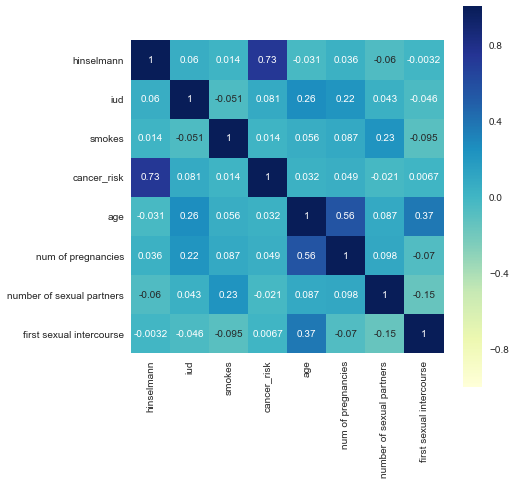

In [88]:
# Creating a heat map of Pear R values to see how other variables relate to cancer risk. May be useful in initial pass-through for filtering features.

correlation = df2.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap="YlGnBu")

Next, let's assess whether there are any differences in the distribution of attributes for each level of our target variable: cancer risk. Based on the outputs below, it appears that the differences in age, pregnancies, number of sexual partners and first sexual intercourse appear to be marginal for all categories. This output is counterintuitive given preexisting literature which suggests a strong correlation between the aformentioned attributes and cervical cancer risk. 

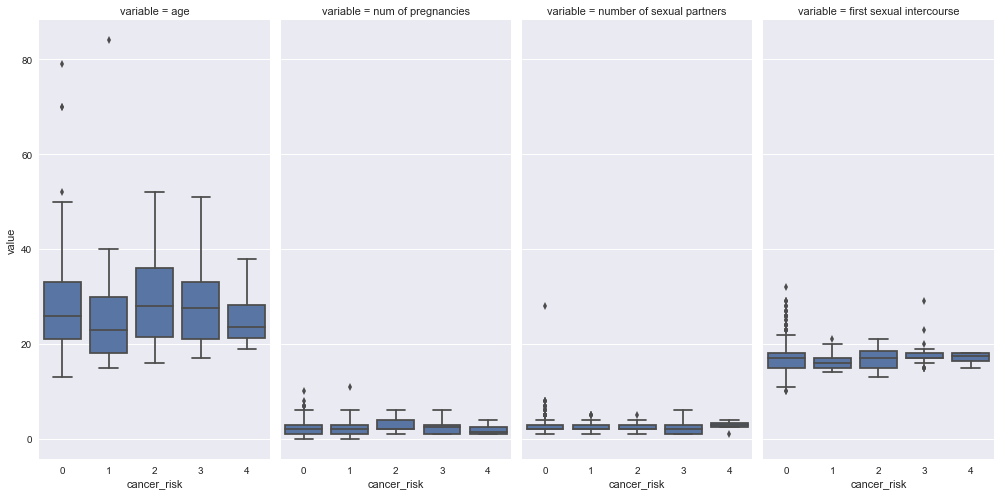

In [89]:
df3 = df2[['cancer_risk','age','num of pregnancies','number of sexual partners', 'first sexual intercourse']]
df3 = pd.melt(df3, id_vars=['cancer_risk'])

g = sns.FacetGrid(df3, col="variable", size=7,aspect=.5)
g = g.map(sns.boxplot,"cancer_risk","value")
plt.show()

We'll utilize countplots to see if there are any clear differences in the remaining attributes, smoking (yes/no) and IUD (uses/does not use). Similar to the prevous attributes, there doesn't appear to be a significant difference in distribution. This, however, doesn't necessarily mean there aren't meaningful differences in these attributes in the population -- it may just mean that the data is too small for these differences to be evident. 

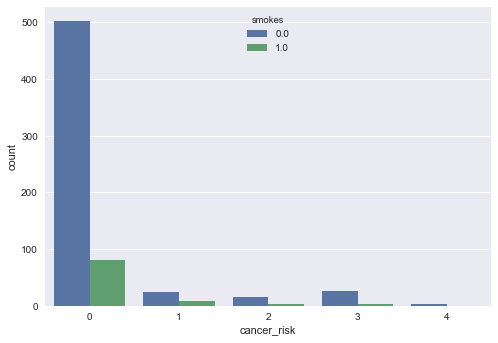

In [90]:
sns.set(style='darkgrid')
ax = sns.countplot(x='cancer_risk',hue='smokes',data=df2)

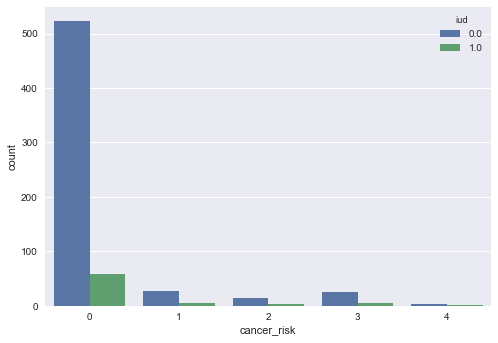

In [91]:
ax = sns.countplot(x='cancer_risk',hue='iud',data=df2)

In [99]:
df2 = df2.drop('hinselmann',axis=1)

## Feature Engineering

Let's transform existing attributes into signals of greater cervical cancer risk as indicated by existing literature. Ideally these new features will serve are more reliable signals for the model and thus improve model performance. 

In [102]:
#Binning age groups into different risk levels based on literature
bins = [0,20,55,90]
group_names = [1,3,2]
categories = pd.cut(df2['age'],bins,labels=group_names)
df2['age_group_risk'] = pd.cut(df2['age'],bins,labels=group_names)

#Multiple sexual partners is a risk factor, creating new feature to flag
df2['multiple_sexual_partners'] = np.where(df2['number of sexual partners'] > 1,1,0)

# Sexual intercourse at 17-years or younger is a risk factor, creating new feature to flag
df2['early_sexual_intercourse'] = np.where(df2['first sexual intercourse'] < 18,1,0)

# Having multiple children is a risk factor, creating new feature to flag
df2['multiple_children'] = np.where(df2['num of pregnancies'] > 1,1,0)

## Feature Reevaluation

This new correlation heatmap reveals that the new features introduce more redundancy rather than novelty to the model as none of them appear to correlate any better to the target variable than the original features selected. 

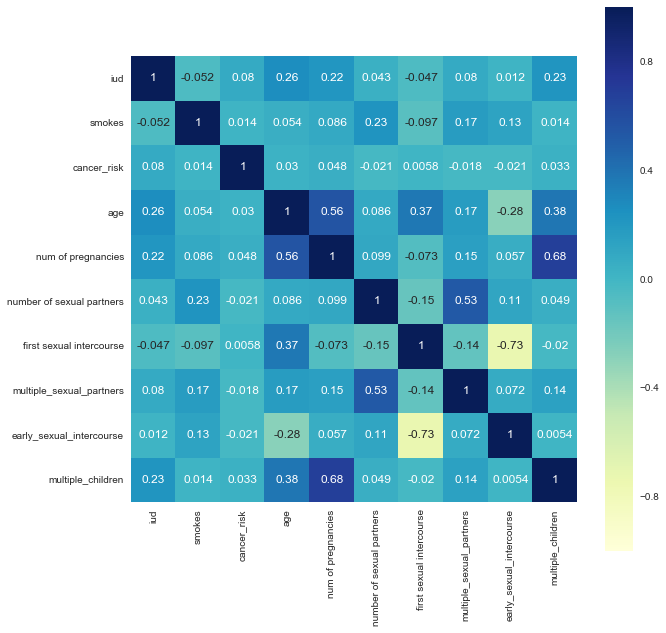

In [101]:
# Creating a heat map of Pear R values to see how other variables relate to cancer risk. May be useful in initial pass-through for filtering features.

correlation = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap="YlGnBu")

Before we embark on reducing features further, we'll first remove the redundant features introduced in the feature engineering process. 

In [112]:
df2 = df2.drop('multiple_sexual_partners',axis=1)
df2 = df2.drop('early_sexual_intercourse',axis=1)
df2 = df2.drop('multiple_children',axis=1)

## Feature Selection

### PCA

Keeping just the first component seems sensible as additional components add little value. 

[ 0.86338532  0.08122058  0.02786143  0.01350461  0.00655223]


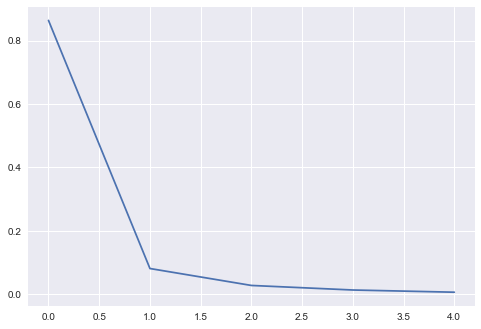

In [113]:
from sklearn import preprocessing

pca = PCA(n_components=5)

df_scaled = StandardScaler().fit_transform(df)

pca.fit_transform(df2)

plt.plot(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_)



In [58]:
print(pca.explained_variance_ratio_)

[ 0.85839684  0.08176301  0.02808515  0.01410862  0.00648081]


### ANOVA F-Test

Another approach to feature reduction would be to conduct an ANOVA F-Test and select the top k features that explain the data. 

In [120]:
from sklearn.feature_selection import SelectKBest,f_classif

features = df2.drop('cancer_risk',axis=1)
target = df2['cancer_risk']

selector = SelectKBest(f_classif, k=3)

selector.fit(features, target)

idxs_selected = selector.get_support(indices=True)
result = features[features.columns[[idxs_selected]]]

In [121]:
result

,iud,first sexual intercourse,age_group_risk
3,0.0,16.0,3
4,0.0,21.0,3
5,0.0,23.0,3
6,1.0,17.0,3
7,1.0,26.0,3
8,0.0,20.0,3
10,0.0,26.0,3
11,0.0,17.0,3
12,1.0,14.0,3
13,0.0,25.0,3
